# X-RAY Transformer Design

## Project Specifications

In this project, we are supposed to design a high-frequency and high voltage transformer. The transformer is desired to operate at minimum 100 kHz and capable of transmitting 30 kW power to the secondary side. The voltage levels for primary and secondary side are respectively ±417 V and ±12.5 kV. 

## Core & Core Material Selection

The design initiates with the selection of the core material. The core is highly important for high frequency pulse transformers. Core specifies core loss and thus the efficiency of the design. Furthermore, it affects the maximum rise time and overshoots of the transmitted square wave.

Transformers are divided into two main sections in the literature: core type transformers and shell type transformers. While core type transformers are used for high voltage, low frequency power systems applications, shell type transformers are selected for small voltage levels and high frequency applications. In this project, shell type transformer is aimed due to high frequency requirement. Although the voltage levels are relatively high, shell type transformer is essential for this design to minimize losses. Since the transformer is desired to be 30 kW, the losses should be minimized and it can be achieved by using shell type transformer. The iron and copper losses are lower than the core type transformers. 

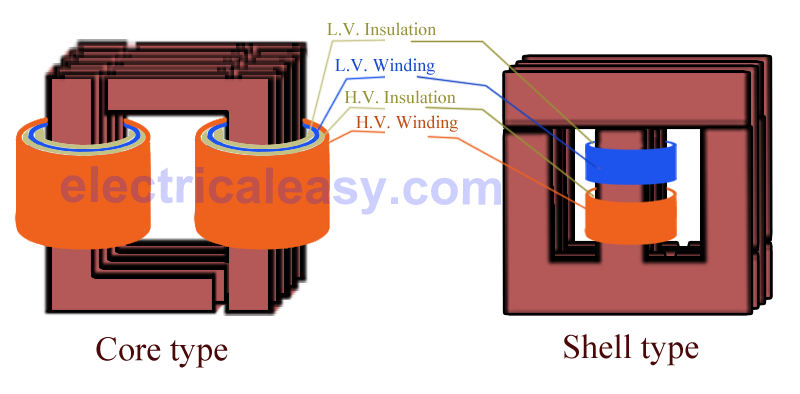

In [13]:
from IPython.display import Image
Image(filename='transformer types.png', width=400, height=400)

There are mainly two shell cores used in industry: CRGO (cold rolled grain oriented) and EE-core. COmmonly EE-core is used for shell type transformers for high frequency applications. CRGO is used for 50 Hz distribution transformers. Thus, an EE-core shell type transformer will be designed in this project. Due to operating at high frequencies, material of the core will be selected as ferrite. Ferrite cores are used for frequencies less than 5 Mhz. These cores have low coercivity which means the material's magnetization can easily be changed in reverse direction without dissipating much energy - that is lower hysteresis losses.

To decide the dimensions of the core, effective core area (Ac) and window area (Aw) should be defined. Ac is defined as the effective area that the actual magnetic flux pass through. Aw is, on the other hand, the area that the primary and secondary windings are located (and insulation material if needed). 

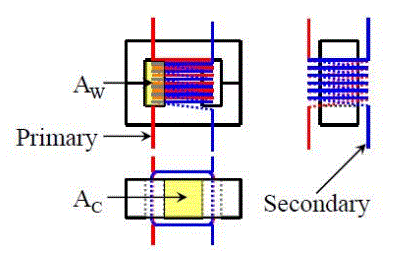

In [15]:
from IPython.display import Image
Image(filename='effective-core.png', width=400, height=400)

In [66]:
import math
eff=0.95;
V1=417; # primary voltage
V2=12500; # secondary voltage
fs=150000; # 150kHz operating freq.
Power=30000; # power level of the transformer
#V=4*N*Bm*Ac*fs; induced voltage @ each side
#((2*N*I)/J)=Kw*Aw; Kw window utilization factor
#Ac*Aw=(V2*I2)/(2*Kw*Bm*fs*J); Bm: operating point of the core
Bm=0.3; 
J=3000000; # J:3A/mm2 
Kw=0.35;
I1=30000/(0.95)/417;
I2=30000/12500;
Acw_m=(V2*I2)/(2*Kw*Bm*fs*J); # Acw: Ac*Aw, m4
Acw=Acw_m*(100000000); # Acw, cm4
print (Acw)

31.746031746031747


The core is selected according to area product, Acw. The selected core is E71 ferrite core (EE-core, area_product=39.06). The dimensions and specifications (core loss) can be seen below.

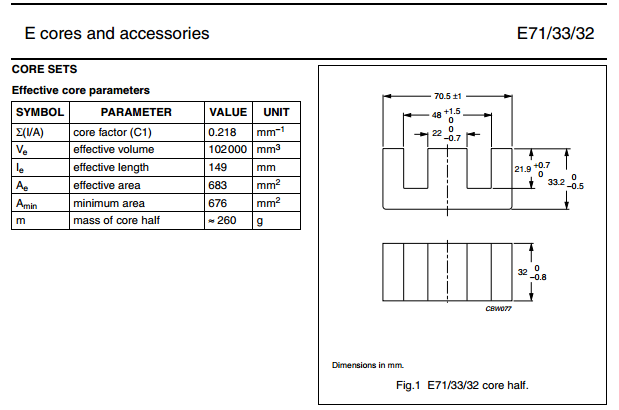

In [4]:
from IPython.display import Image
Image(filename='core_dimensions.png', width=500, height=500)

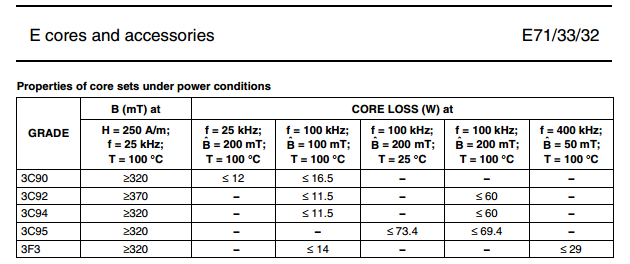

In [5]:
from IPython.display import Image
Image(filename='core_loss.png', width=500, height=500)

In [61]:
Ac=0.000683; # effective core area in m2
Aw=0.000572; # winding area in m2
Ve=102; # effective volum in cm3
MLT=0.149; # effective length in meters
mass_core=0.52; # core mass in kg

## Turn Ratio & Wire Selection

Until now, the material of the core and its shape is selected. Now, the turn ratio and diameter of the wire will be determined.

In [11]:
N1=V1/(4*Bm*Ac*fs);
N2=V2/(4*Bm*Ac*fs);
print (N1,N2)

3.391898487066862 101.6756141207093


Thus the turns ratios are not integer, we round N1 to the nearest integer number. However, N2 should be 30 multiple of N1. Thus, it is found from using N1. 

In [47]:
N1=4;
N2=120;

To calculate the diameter of the wire, we need to know skin depth. Skin depth is the length of the material of which effectively to be used for the current. 

In [25]:
p=1.678*1e-8; # resistivity of the copper
ur=0.999; # relative permeability of the copper
u0=4*math.pi*1e-7;
skin_depth=math.sqrt(p/(math.pi*fs*ur*u0))*100; # skin depth in centimeters
Dcop=2*skin_depth; # diameter of the copper in centimeters
Acop=math.pi*(skin_depth)*(skin_depth); # copper wire area in cm2
print (Acop)

0.0008910977461067744


In this design, it is aimed to decrease losses. For the high frequency applications, skin effect and proximity effect is a important measure for the losses. By using minimal cable wire size, the skin effect loss - which comes from copper loss indeed - will be decreased. According to upper core area calculation, the AWG27 copper is the best choice. For AWG27, the maximum current which can be passed through is 0.288A. Since the input and output currents are almost 72A and 2.4A, the cable should be stranded - that is Litz wire. Now, we need to calculate the dimensions of the stranded cable and look whether it is applicable for this transformer.

In [50]:
Acop=0.102; # copper area for AWG27 in mm2
Dcop=0.361; # diameter of the core in mm
I_av=0.288; # maximum current which can be passed through of single strand AWG27
N1_strand=round(I1/I_av,0); # number of strands for primary side wire
N2_strand=round(I2/I_av,0); # number of strands for secondary side wire
D1_strand=round(math.sqrt(4*N1_strand*Acop/(math.pi)),2); # diameter of the primary side strand in mm
D2_strand=round(math.sqrt(4*N2_strand*Acop/(math.pi)),2); # diameter of the primary side strand in mm
print (N1_strand)
print (N2_strand)
print (D1_strand)
print (D2_strand)

263.0
8.0
5.84
1.02


# Losses (Core & Copper Losses)

## Copper Losses

To calculate the copper losses, we need to know firstly the resistance of a 1 multi-strand wire for each side. Then, the total resistivity of each side will be calculated taking into account the turn-ratios. After that we can calculate copper losses. 

The winding of the primary and secondary side will be applied to the medium part of the core. Thus, we need to know the perimeter of the related core section and find the total length for a single-strand. We will wind the primary winding to the core firstly. Then, the secondary winding will be winded onto primary winding. Thus, the length of the strands are different and this will be taken into account at the below calculations.

In [48]:
R_awg27= 0.168; # ohm per meter
Perimeter1=(2*(22+32))/1000; # perimeter for primary of the related core section in m
R1_single_wire=R_awg27*Perimeter1; # resistance of a single wire for that perimeter
R1_strand=R1_single_wire/N1_strand; # resistance of a single strand for primary
R1_total=N1*R1_strand; # resistance of the primary side in ohm
Perimeter2=((2*(22+32))+D1_strand+(D2_strand*1.5))/1000; # perimeter for secondary of the related core section in m
R2_single_wire=R_awg27*Perimeter2; # resistance of a single wire for that perimeter
R2_strand=R2_single_wire/N2_strand; # resistance of a single strand for primary
R2_total=N2*R2_strand; # resistance of the primary side in ohm
print (R1_strand)
print (R1_total)
print (R2_strand)
print (R2_total)

6.898859315589354e-05
0.00027595437262357416
0.0024227700000000003
0.29073240000000006


The resistances for each side have been calculated above. Now, it turns out that the copper losses can be calculated.

In [51]:
Cop_Loss_1=round(I1*I1*R1_total,2);
Cop_Loss_2=round(I2*I2*R2_total,2);
Pcu=round(Cop_Loss_1+Cop_Loss_2,2);
print (Cop_Loss_1)
print (Cop_Loss_2)
print (Pcu) # total copper loss in W

1.58
1.67
3.25


## Core Losses

Core loss can be calculated using Steinmetz equation. The ferrite core used for this design is 3C90 grade. Using the coefficients of this material, core loss can be calculated.

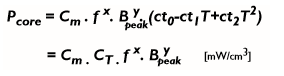

In [55]:
from IPython.display import Image
Image(filename='core_loss_formula.png', width=200, height=200)

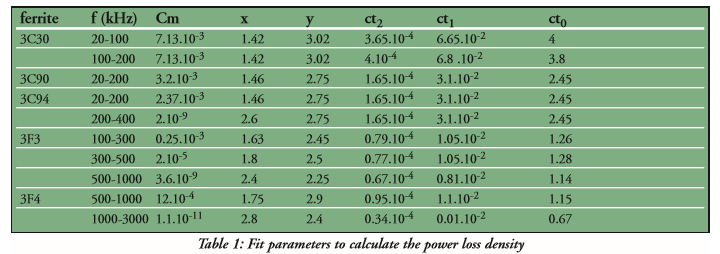

In [57]:
from IPython.display import Image
Image(filename='steinmetz_parameters.png', width=500, height=500)

In [64]:
Cm=3.2*1e-3;
x=1.46;
y=2.75;
ct2=1.65*1e-4;
ct1=3.1*1e-2;
ct0=2.45;
T=25; # operating temperature is 25C 
Pcore_mW=Cm*(fs**x)*(Bm**y)*(ct0-ct1*T+ct2*(T**2)); # core loss mW/cm3
Pcore= round(Ve*Pcore_mW/1000,2); # core loss in W
print (Pcore)

763.64


Total loss of the core is found to be as below:

In [65]:
Ploss=Pcu+Pcore;
print ( 'Ploss = ', Ploss, 'W')

Ploss =  766.89 W


We have started to the design with efficiency of 0.95. At the end of the design, let's recalculate the efficiency. There is a small difference but it is acceptable for now. We can improve the design by iterating for a second time; however, it is thought that there is no need for this since the transformer is barely used during its lifetime and efficiency is not a big factor.

In [69]:
Pnet=Power-Ploss;
Eff_end=Pnet/Power;
print ('Efficiency is ', Eff_end,'.')

Efficiency is  0.974437 .


# Temperature Rise

We can use the formula for the ferrite core below to find the temperature rise if the core is always used (duty cycle = 100%).

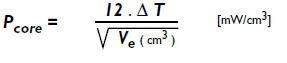

In [70]:
from IPython.display import Image
Image(filename='temperature_rise.png', width=200, height=200)

In [72]:
delta_T=Pcore_mW*math.sqrt(Ve)/12;
print ('Temperature rise is ',round(delta_T,1),'C if the core is used with a duty cycle of 100%. ')

Temperature rise is  6301.0 C if the core is used with a duty cycle of 100%. 


However, it is assumed that the transformer is used with a duty cycle of 0.2% during its lifetime. Thus, it is estimated that temperature rise will be such that:

In [73]:
delta_T=(Pcore_mW*math.sqrt(Ve)/12)/500;
print ('Temperature rise is ',round(delta_T,1),'C if the core is used with a duty cycle of 0.2%. ')

Temperature rise is  12.6 C if the core is used with a duty cycle of 0.2%. 


# Core & Copper Mass